In [1]:
import numpy as np
np.random.seed(122)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

In [2]:
def plot_surface(clf, X, y, n_steps=250, subplot=None, show=True,
                 ylim=None, xlim=None):
    if subplot is None:
        fig = plt.figure()
    else:
        plt.subplot(*subplot)

    if xlim is None:
        xlim = X[:, 0].min(), X[:, 0].max()
    if ylim is None:
        ylim = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], n_steps),
                         np.linspace(ylim[0], ylim[1], n_steps))

    if hasattr(clf, "decision_function"):
        z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, alpha=0.8, cmap=plt.cm.RdBu_r)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlim(*xlim)
    plt.ylim(*ylim)

In [3]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

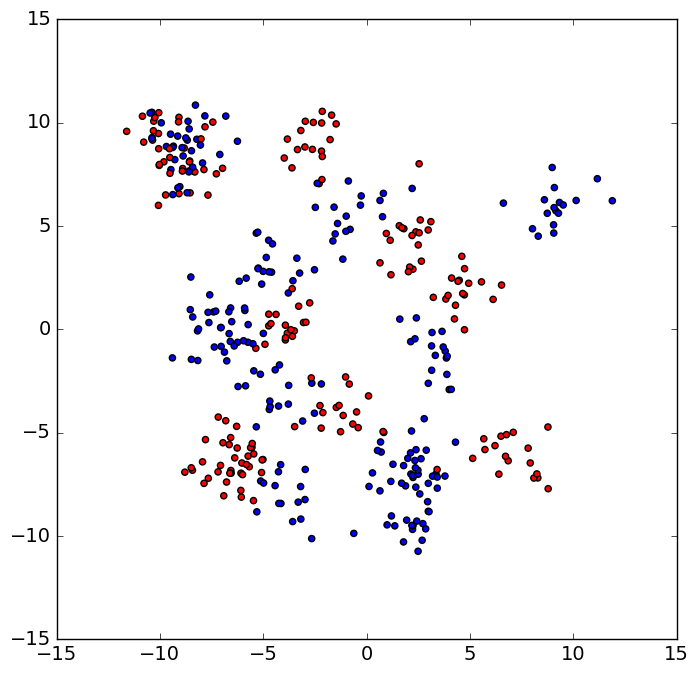

In [4]:
bubbles = plt.figure()
#print(len(X[::,0]))
#print(y)
plt.scatter(X[::,0],X[::,1],c=y)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
# The splitting is random with a 0.9 training factor. To see how it works

In [6]:
print('length train= ' + str(len(X_train)))
print('length test= ' + str(len(X_test)))

length train= 360
length test= 40


In [7]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

0.938888888889


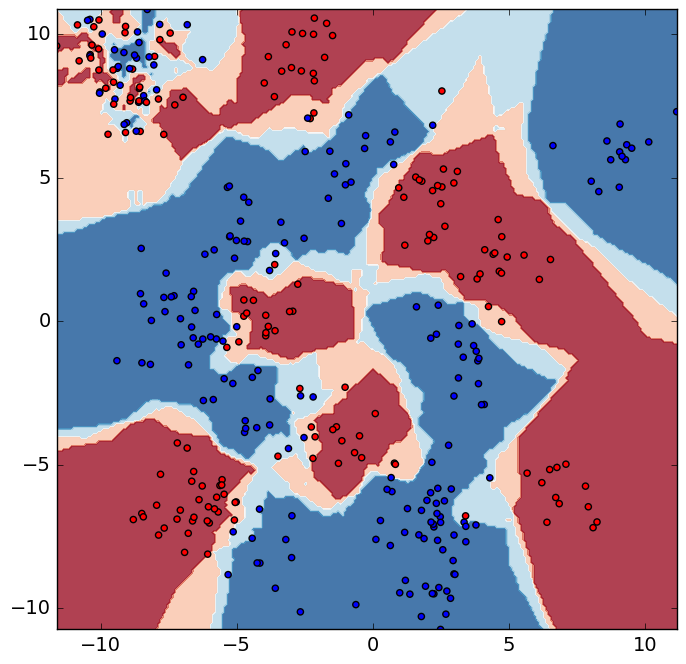

In [8]:
train_score = clf.score(X_train, y_train)
print(train_score)
plot_surface(clf, X_train, y_train)
plt.show()

0.8


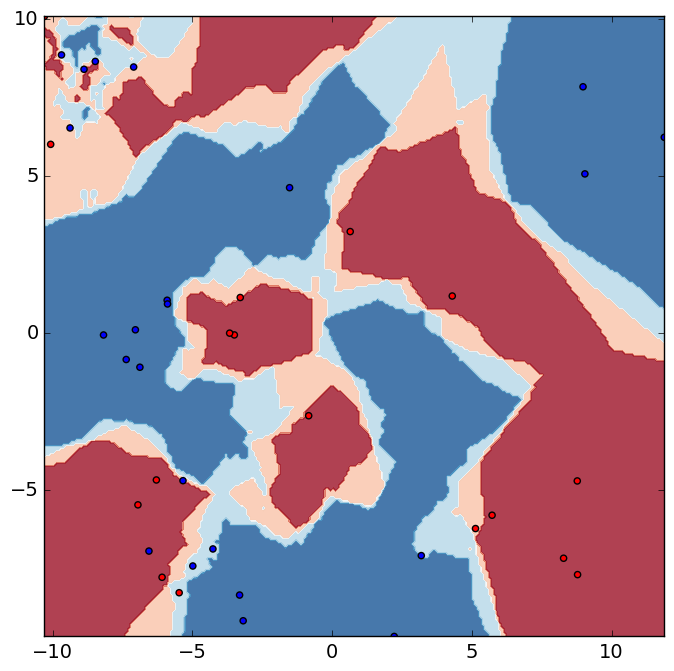

In [9]:
test_score = clf.score(X_test, y_test)
print(test_score)
plot_surface(clf, X_test, y_test)
plt.show()

In [10]:
test_scores = []
train_scores = []
test_sizes = []
for i in xrange(99):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01*i+0.01)
    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(X_test, y_test)
    test_score = clf.score(X_test, y_test)
    train_score = clf.score(X_train, y_train)
    test_scores.append(test_score)
    train_scores.append(train_score)
    test_sizes.append(0.01*i+0.01)
    print("Test size: {:.0%}".format(0.01*i+0.01) + ", test score = {:.1%}".format(test_score))
    #plot_surface(clf, X_test, y_test)
    #plt.show()

Test size: 1%, test score = 50.0%
Test size: 2%, test score = 75.0%
Test size: 3%, test score = 66.7%
Test size: 4%, test score = 87.5%
Test size: 5%, test score = 95.0%
Test size: 6%, test score = 80.0%
Test size: 7%, test score = 82.1%
Test size: 8%, test score = 81.2%
Test size: 9%, test score = 86.1%
Test size: 10%, test score = 75.0%
Test size: 11%, test score = 88.6%
Test size: 12%, test score = 83.3%
Test size: 13%, test score = 86.5%
Test size: 14%, test score = 84.2%
Test size: 15%, test score = 86.9%
Test size: 16%, test score = 93.8%
Test size: 17%, test score = 88.2%
Test size: 18%, test score = 83.6%
Test size: 19%, test score = 92.1%
Test size: 20%, test score = 85.0%
Test size: 21%, test score = 90.6%
Test size: 22%, test score = 88.6%
Test size: 23%, test score = 92.4%
Test size: 24%, test score = 94.8%
Test size: 25%, test score = 93.0%
Test size: 26%, test score = 91.3%
Test size: 27%, test score = 95.4%
Test size: 28%, test score = 90.3%
Test size: 29%, test score = 

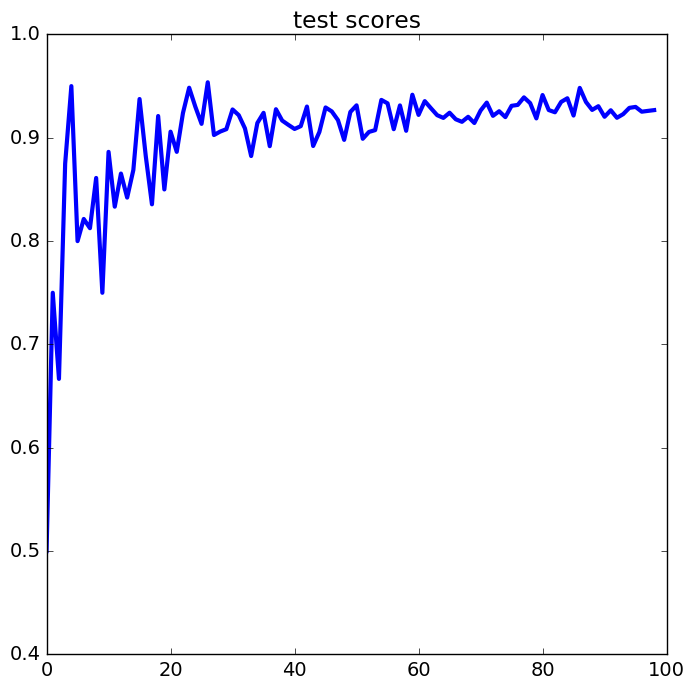

In [11]:
plt.plot(test_scores, c='b', alpha=1, lw=3)
plt.title("test scores")
plt.show()

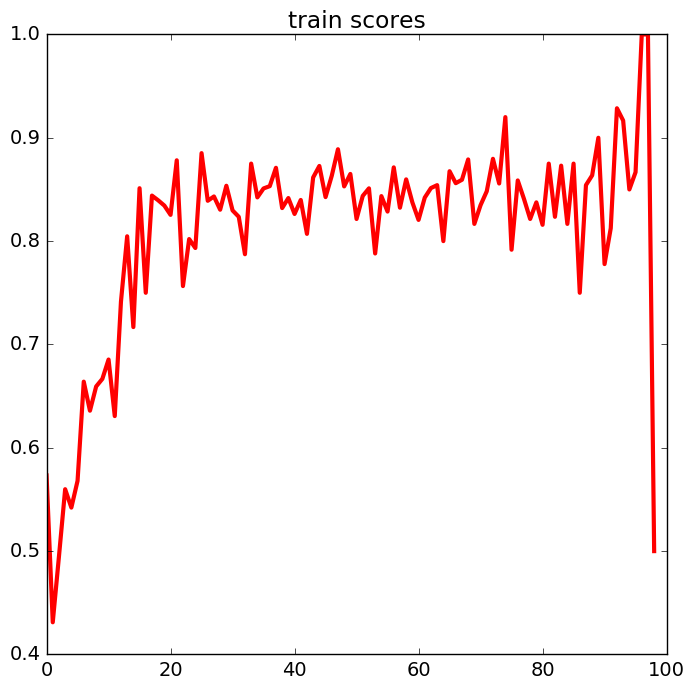

In [12]:
plt.plot(train_scores, c='r', alpha=1, lw=3)
plt.title("train scores")
plt.show()

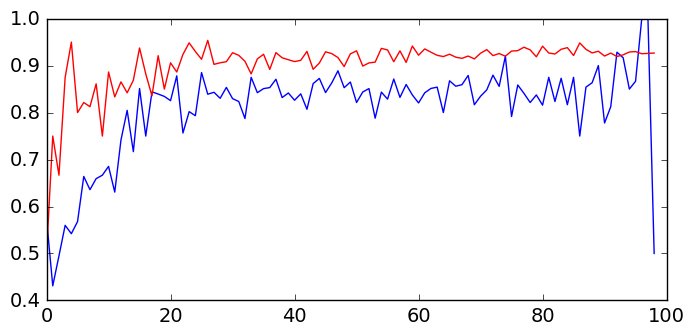

In [13]:
plt.subplot(211)
plt.plot(train_scores, color='b')
plt.plot(test_scores, color='r')
plt.show()

In [14]:
test_scores = []
train_scores = []
n_sizes = []
for i in xrange(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
    clf = KNeighborsClassifier(n_neighbors=i+1)
    clf.fit(X_test, y_test)
    test_score = clf.score(X_test, y_test)
    train_score = clf.score(X_train, y_train)
    test_scores.append(test_score)
    train_scores.append(train_score)
    n_sizes.append(i+1)
    print("N: {:}".format(i+1) + ", test score = {:.1%}".format(test_score))

N: 1, test score = 100.0%
N: 2, test score = 93.1%
N: 3, test score = 93.8%
N: 4, test score = 90.0%
N: 5, test score = 87.5%
N: 6, test score = 89.4%
N: 7, test score = 90.6%
N: 8, test score = 88.1%
N: 9, test score = 88.8%
N: 10, test score = 88.8%
N: 11, test score = 87.5%
N: 12, test score = 85.0%
N: 13, test score = 77.5%
N: 14, test score = 76.2%
N: 15, test score = 77.5%
N: 16, test score = 72.5%
N: 17, test score = 76.9%
N: 18, test score = 70.6%
N: 19, test score = 60.0%
N: 20, test score = 62.5%
N: 21, test score = 67.5%
N: 22, test score = 62.5%
N: 23, test score = 56.9%
N: 24, test score = 65.0%
N: 25, test score = 64.4%
N: 26, test score = 58.8%
N: 27, test score = 60.0%
N: 28, test score = 61.9%
N: 29, test score = 60.6%
N: 30, test score = 65.0%
N: 31, test score = 63.1%
N: 32, test score = 61.3%
N: 33, test score = 53.1%
N: 34, test score = 64.4%
N: 35, test score = 62.5%
N: 36, test score = 58.1%
N: 37, test score = 53.1%
N: 38, test score = 61.9%
N: 39, test score = 

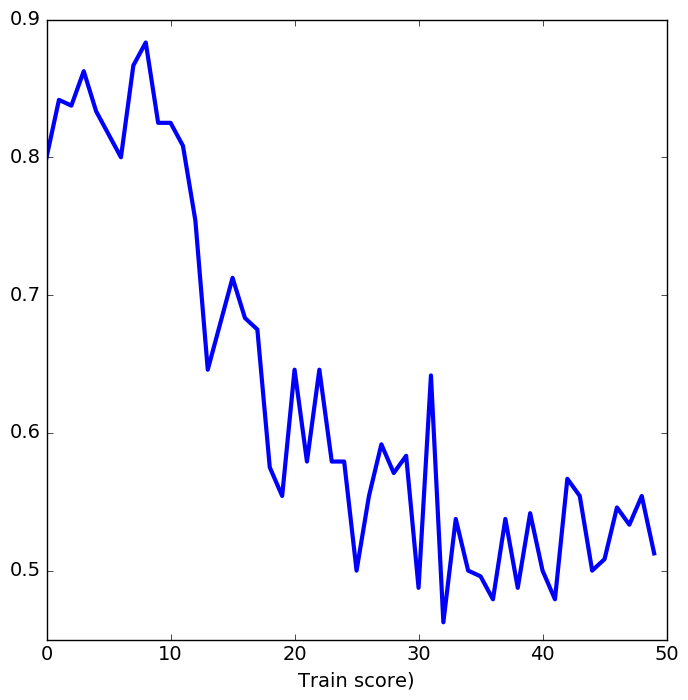

In [15]:
plt.plot(train_scores, c='b', alpha=1, lw=3)
plt.xlabel('n_neighbors')
plt.xlabel('Train score)')
plt.show()

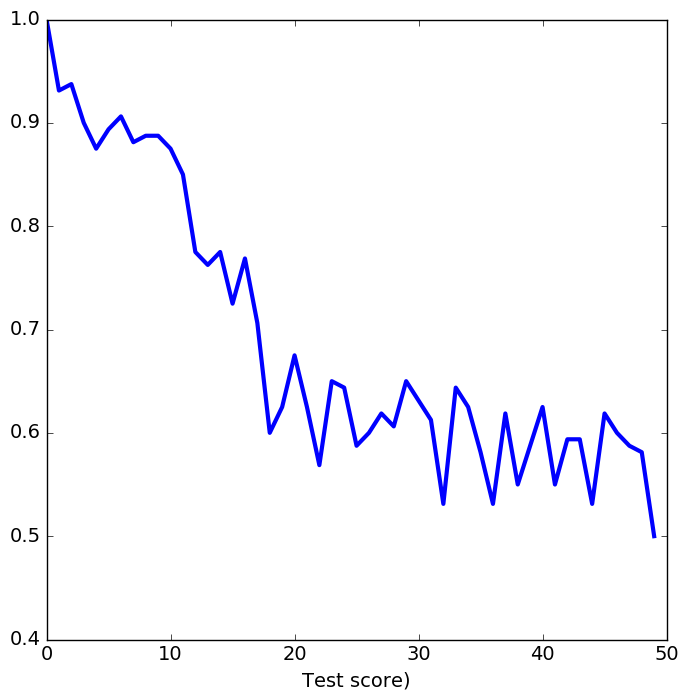

In [16]:
plt.plot(test_scores, c='b', alpha=1, lw=3)
plt.xlabel('n_neighbors')
plt.xlabel('Test score)')
plt.show()